In [1]:
library(tidyverse)
library(purrr)
library(treemap)
library(RColorBrewer)
library(psych)
library(reshape2)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



# Import and Tidy:

### Initial Import:

In [2]:
movies <- read_csv("supporting_files/movie_metadata.csv")
head(movies)

Parsed with column specification:
cols(
  .default = col_integer(),
  color = col_character(),
  director_name = col_character(),
  actor_2_name = col_character(),
  genres = col_character(),
  actor_1_name = col_character(),
  movie_title = col_character(),
  actor_3_name = col_character(),
  plot_keywords = col_character(),
  movie_imdb_link = col_character(),
  language = col_character(),
  country = col_character(),
  content_rating = col_character(),
  imdb_score = col_double(),
  aspect_ratio = col_double()
)
See spec(...) for full column specifications.
Warning message:
“4 parsing failures.
 row    col   expected      actual                                  file
2324 budget an integer 2400000000  'supporting_files/movie_metadata.csv'
2989 budget an integer 12215500000 'supporting_files/movie_metadata.csv'
3006 budget an integer 2500000000  'supporting_files/movie_metadata.csv'
3860 budget an integer 4200000000  'supporting_files/movie_metadata.csv'
”

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,NA,NA,12,7.1,NA,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000


Transpose to make easier to understand:

In [3]:
glimpse(movies)

Observations: 5,043
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color", NA, "...
$ director_name             <chr> "James Cameron", "Gore Verbinski", "Sam M...
$ num_critic_for_reviews    <int> 723, 302, 602, 813, NA, 462, 392, 324, 63...
$ duration                  <int> 178, 169, 148, 164, NA, 132, 156, 100, 14...
$ director_facebook_likes   <int> 0, 563, 0, 22000, 131, 475, 0, 15, 0, 282...
$ actor_3_facebook_likes    <int> 855, 1000, 161, 23000, NA, 530, 4000, 284...
$ actor_2_name              <chr> "Joel David Moore", "Orlando Bloom", "Ror...
$ actor_1_facebook_likes    <int> 1000, 40000, 11000, 27000, 131, 640, 2400...
$ gross                     <int> 760505847, 309404152, 200074175, 44813064...
$ genres                    <chr> "Action|Adventure|Fantasy|Sci-Fi", "Actio...
$ actor_1_name              <chr> "CCH Pounder", "Johnny Depp", "Christoph ...
$ movie_title               <chr> "Avatar ", "Pirates of the Caribbean: At ...
$ num_voted_users 

### Verify integrity of all variables:

##### Check for parsing errors:

In [4]:
parse_errs <- problems(movies)
parse_errs

row,col,expected,actual,file
2324,budget,an integer,2400000000,'supporting_files/movie_metadata.csv'
2989,budget,an integer,12215500000,'supporting_files/movie_metadata.csv'
3006,budget,an integer,2500000000,'supporting_files/movie_metadata.csv'
3860,budget,an integer,4200000000,'supporting_files/movie_metadata.csv'


Why such high budgets? Pull out each row and transpose to see details:

In [5]:
prob_values <- movies[parse_errs$row,]
glimpse(prob_values)

Observations: 4
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color"
$ director_name             <chr> "Hayao Miyazaki", "Joon-ho Bong", "Lajos ...
$ num_critic_for_reviews    <int> 174, 363, 73, 202
$ duration                  <int> 134, 110, 134, 112
$ director_facebook_likes   <int> 6000, 584, 45, 0
$ actor_3_facebook_likes    <int> 745, 74, 0, 38
$ actor_2_name              <chr> "Jada Pinkett Smith", "Kang-ho Song", "Pé...
$ actor_1_facebook_likes    <int> 893, 629, 9, 717
$ gross                     <int> 2298191, 2201412, 195888, 211667
$ genres                    <chr> "Adventure|Animation|Fantasy", "Comedy|Dr...
$ actor_1_name              <chr> "Minnie Driver", "Doona Bae", "Marcell Na...
$ movie_title               <chr> "Princess Mononoke ", "The Host ", "Fatel...
$ num_voted_users           <int> 221552, 68883, 5603, 53508
$ cast_total_facebook_likes <int> 2710, 1173, 11, 907
$ actor_3_name              <chr> "Billy Crudup", "Ah-sung Ko", "Bál

All international films - I'm betting they're showing the `budget` column all in a foreign currency. Note, Tibble framework sets all parsing errors to `NA`, so I'll disregard for now and let them be `NA`.

##### Check for obvious duplicate data:

In [6]:
dupes <- which(duplicated(movies))
dupes
head(movies[dupes,])

[1]  138  188  205  304  390  396  591  657  795 1221 1306 1450 2170 2293 2473
[16] 2494 2534 2563 2569 2620 2772 2778 2799 2972 3118 3346 3453 3481 3730 3901
[31] 3916 4183 4227 4283 4314 4409 4566 4574 4632 4770 4883 4928 4943 4951 4952

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,David Yates,248,110,282,103,Alexander Skarsgård,11000,124051759,Action|Adventure|Drama|Romance,⋯,239,English,USA,PG-13,180000000,2016,10000,6.6,2.35,29000
Color,Bill Condon,322,115,386,12000,Kristen Stewart,21000,292298923,Adventure|Drama|Fantasy|Romance,⋯,329,English,USA,PG-13,120000000,2012,17000,5.5,2.35,65000
Color,Hideaki Anno,1,120,28,12,Shin'ya Tsukamoto,544,NA,Action|Adventure|Drama|Horror|Sci-Fi,⋯,13,Japanese,Japan,NA,NA,2016,106,8.2,2.35,0
Color,Joe Wright,256,111,456,394,Cara Delevingne,20000,34964818,Adventure|Family|Fantasy,⋯,186,English,USA,PG,150000000,2015,548,5.8,2.35,24000
Color,Josh Trank,369,100,128,78,Reg E. Cathey,596,56114221,Action|Adventure|Sci-Fi,⋯,695,English,USA,PG-13,120000000,2015,360,4.3,2.35,41000
Color,Rob Cohen,187,106,357,4000,Vin Diesel,23000,144512310,Action|Crime|Thriller,⋯,988,English,USA,PG-13,38000000,2001,14000,6.7,2.35,14000


Yes, so create new data frame that removes all duplicate observations:

In [7]:
movies <- movies[which(!duplicated(movies)),]
head(movies)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,NA,NA,12,7.1,NA,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000


In [8]:
summary(movies)

    color           director_name      num_critic_for_reviews    duration    
 Length:4998        Length:4998        Min.   :  1.0          Min.   :  7.0  
 Class :character   Class :character   1st Qu.: 50.0          1st Qu.: 93.0  
 Mode  :character   Mode  :character   Median :110.0          Median :103.0  
                                       Mean   :139.9          Mean   :107.2  
                                       3rd Qu.:195.0          3rd Qu.:118.0  
                                       Max.   :813.0          Max.   :511.0  
                                       NA's   :49             NA's   :15     
 director_facebook_likes actor_3_facebook_likes actor_2_name      
 Min.   :    0.0         Min.   :    0.0        Length:4998       
 1st Qu.:    7.0         1st Qu.:  133.0        Class :character  
 Median :   49.0         Median :  369.0        Mode  :character  
 Mean   :  688.7         Mean   :  639.9                          
 3rd Qu.:  192.0         3rd Qu.:  635.0 

Left with 4,998 rows. 

##### Discuss - is data "tidy"?

Things to keep an eye on from looking at summary again:

* multiple variables have `NA` instead of a value. Ones to be aware of:
  * `duration`: strange that a movie's duration is unknown. Thankfully only 15 instances.
  * `budget`: also strange if no value here, but for the 4 instances of foreign film I found, makes sense. Many more here, at 496.
  * `title_year`: each film definitely has a year it was finished, so strange that 108 instances
  * `aspect_ratio`: 329 instances. But note not really interesting variable given aspect ratio is often modified for some films (3:4 to 16:9)
  * some values may be very excessive - like in `budget`, which has a max of approximatel 2,128,000,000. I'm sure never been movie made for over two billion dollars

Notes/checks on tidyness:
* each variable has its own column? Of the 28 variables shown, each represents a unique type of measurement. Check.
* each observation has its own row? Yes, no values exist that branch out into their own measurements. Check.
* each value has its own cell? No, but will treat `plot_keywords` and `generes` as-is. Notes:
  * `genres` is up to five genre keywords in alphabetical order and strings restricted to a representative keyword (ex. there is SciFi but no Scifi). Can leverage this by treating each unique combination as a measurement.
  * `plot_keywords` has only five keywords from many that were grabbed, and a nearly infinite number of combinations of any word or short phrase from human language. So leaving this as-is (but possibly using n-grams or something else)
  
So in summary, checked for parsing errors, removed duplicate data, reviewed data frame for NA and extreme values, checked if tidy, removed duplicates. Good to go!

### Review/document data and its structure
So what do I have here? No single source of documentation. Spread out between Kaggle, GitHub, a blog post and discussion threads:https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset/discussion/24385

Look at variable names:

In [9]:
colnames(movies)

[1] "color"                     "director_name"            
 [3] "num_critic_for_reviews"    "duration"                 
 [5] "director_facebook_likes"   "actor_3_facebook_likes"   
 [7] "actor_2_name"              "actor_1_facebook_likes"   
 [9] "gross"                     "genres"                   
[11] "actor_1_name"              "movie_title"              
[13] "num_voted_users"           "cast_total_facebook_likes"
[15] "actor_3_name"              "facenumber_in_poster"     
[17] "plot_keywords"             "movie_imdb_link"          
[19] "num_user_for_reviews"      "language"                 
[21] "country"                   "content_rating"           
[23] "budget"                    "title_year"               
[25] "actor_2_facebook_likes"    "imdb_score"               
[27] "aspect_ratio"              "movie_facebook_likes"

To clarify some variables that didn't make sense:

* `num_critic_for_reviews`: number of reviews written by other, non IMDB sources compiled by IMDB
* `num_voted_users`: number of IMDB user-generated star-only reviews on a scale of 1-10
* `num_user_for_reviews`: number of IMDB user-generated star/text reviews
* `actor_1_facebook_likes`: (same for actor 2 and 3) refers to how many people liked the IMDb page for either of the three leading actors. This isn't really all that reliable. Also, scraper determined Actor 1, 2, 3 as a rank of these fb likes. Some movies, the main character is NOT listed there, which is misleading. Examples, Avatar, MIB 3, etc.
* cast_total_facebook_likes is simply the aggregate of all possible actors facebook likes from the movie (again, only for each actor's fb page from IMDB)

I think it would be helpful to rename some of these variables:

In [10]:
movies <- rename(movies,
      external_reviews = num_critic_for_reviews,
      star_ratings = num_voted_users,
      imdb_user_reviews = num_user_for_reviews)

In [11]:
glimpse(movies)

Observations: 4,998
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color", NA, "...
$ director_name             <chr> "James Cameron", "Gore Verbinski", "Sam M...
$ external_reviews          <int> 723, 302, 602, 813, NA, 462, 392, 324, 63...
$ duration                  <int> 178, 169, 148, 164, NA, 132, 156, 100, 14...
$ director_facebook_likes   <int> 0, 563, 0, 22000, 131, 475, 0, 15, 0, 282...
$ actor_3_facebook_likes    <int> 855, 1000, 161, 23000, NA, 530, 4000, 284...
$ actor_2_name              <chr> "Joel David Moore", "Orlando Bloom", "Ror...
$ actor_1_facebook_likes    <int> 1000, 40000, 11000, 27000, 131, 640, 2400...
$ gross                     <int> 760505847, 309404152, 200074175, 44813064...
$ genres                    <chr> "Action|Adventure|Fantasy|Sci-Fi", "Actio...
$ actor_1_name              <chr> "CCH Pounder", "Johnny Depp", "Christoph ...
$ movie_title               <chr> "Avatar ", "Pirates of the Caribbean: At ...
$ star_ratings    

Ok, data is now tidy and documented well-enough and looks good.

# EDA (Visualize <-> Transform <-> Model)

Preliminary visualizations:
Look at dataframe again:

In [12]:
glimpse(movies)

Observations: 4,998
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color", NA, "...
$ director_name             <chr> "James Cameron", "Gore Verbinski", "Sam M...
$ external_reviews          <int> 723, 302, 602, 813, NA, 462, 392, 324, 63...
$ duration                  <int> 178, 169, 148, 164, NA, 132, 156, 100, 14...
$ director_facebook_likes   <int> 0, 563, 0, 22000, 131, 475, 0, 15, 0, 282...
$ actor_3_facebook_likes    <int> 855, 1000, 161, 23000, NA, 530, 4000, 284...
$ actor_2_name              <chr> "Joel David Moore", "Orlando Bloom", "Ror...
$ actor_1_facebook_likes    <int> 1000, 40000, 11000, 27000, 131, 640, 2400...
$ gross                     <int> 760505847, 309404152, 200074175, 44813064...
$ genres                    <chr> "Action|Adventure|Fantasy|Sci-Fi", "Actio...
$ actor_1_name              <chr> "CCH Pounder", "Johnny Depp", "Christoph ...
$ movie_title               <chr> "Avatar ", "Pirates of the Caribbean: At ...
$ star_ratings    

Now a very quick and dirty plot of all continuous variables:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2043 rows containing non-finite values (stat_bin).”

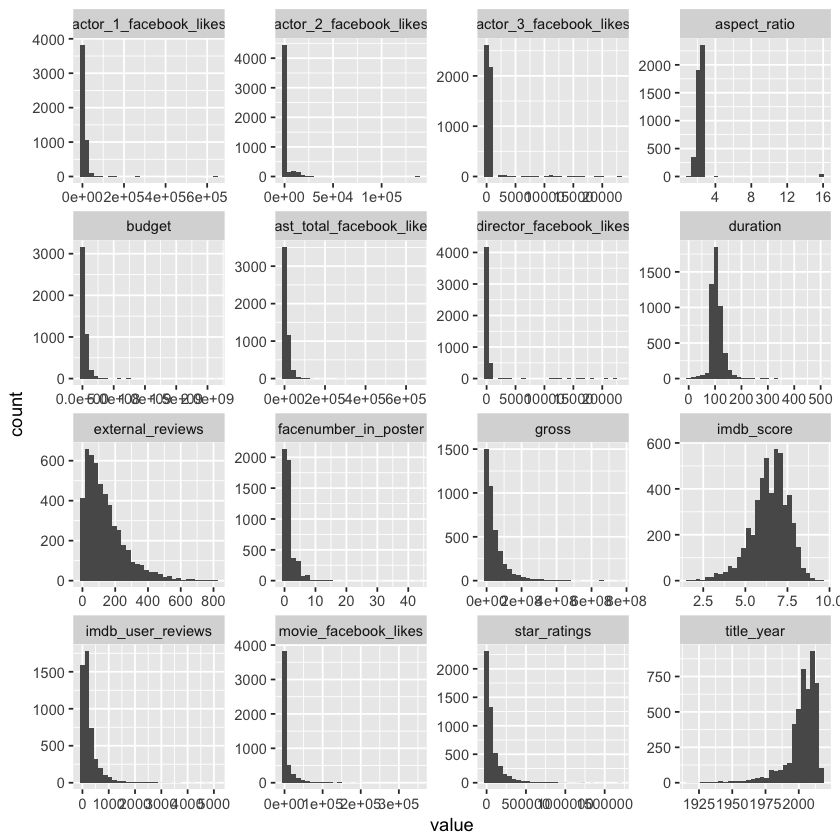

In [13]:
movies %>%
    keep(is.numeric) %>%
    gather() %>%
    ggplot(aes(x = value)) +
        facet_wrap(~ key, scales = "free") +
        geom_histogram()

Some of these plots are highly skewed and make it difficult to see well (the top row for example). I would like to transform a few of them to log scale to make easier to interpret:

Starting with all facebook like plots:
* actor_1_facebook_likes
* actor_2_facebook_likes
* actor_3_facebook_likes
* cast_total_facebook_likes
* director_facebook_likes
* movie_facebook_likes

First check out summary so I know what some of my min and max should be:

Now plot them with log base 10 transformation: Note, restricted to more than 0 fb likes:

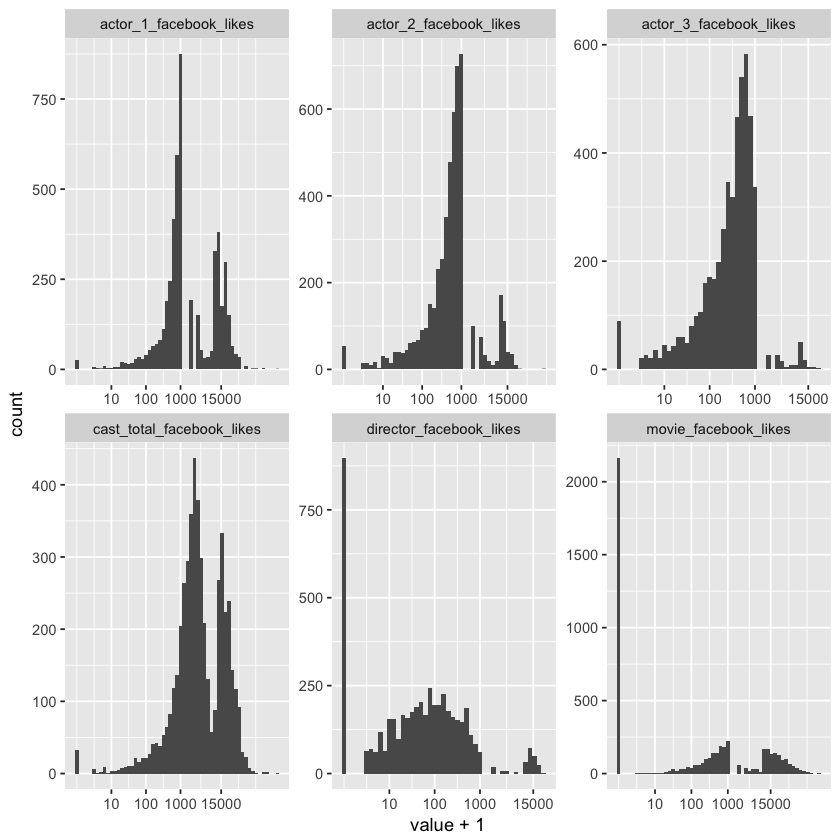

In [14]:
movies %>%
    select(actor_1_facebook_likes,
              actor_2_facebook_likes,
              actor_3_facebook_likes,
              cast_total_facebook_likes,
              director_facebook_likes,
              movie_facebook_likes) %>%
    gather() %>%
    # shift all values over by 1 to avoid undefined
    ggplot(aes(x = value + 1)) +
        geom_histogram(binwidth = .1, na.rm = TRUE) +
        scale_x_log10(breaks = c(10, 100, 1000, 15000)) +
        facet_wrap(~ key, scales = "free")

Single spike at beginning is anything from dataset that had 0 as count for fb likes (I added 1, then log base 10 of 1 equals 0).

What are the gaps from? Looking at the original data I see that for some of the variables, the amount of likes are varied up until about 1000, but then after that they jump up in increments of 1000. This supports the fact that we are dealing with scraped data here!!! The scraper is only grabbing tags from the page, so if below 1000, the actual number is shown. If above, it is 1K, 1.3K, etc. So teh scraper didn't even grab after teh decimal...

What learn from doing this? 
* scraped data is shit and needs lots of checks
* throw it all away? Fickle, yes, but I do like to know:
    * the sum aggregate of all cast fb likes
    * director
    * movie

Makes sense tht more cast fb likes because likes are aggregated across a whole cast. I'm good with just these three

* director fb likes much lower in quantity and spread more evenly betwen low numbers and 1000.

So now I've taken the log of all x value fb likes and binned them in a histogram. This has condensed the positive tail into my bins to give me a different perspective on an exponentially increasing x ticks scale.

Now, remaining continuous variables:

* budget
* gross
* facenumber_in_poster
* star_ratings
* imdb_user_reviews
* external_reviews

Warning message:
“Transformation introduced infinite values in continuous x-axis”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


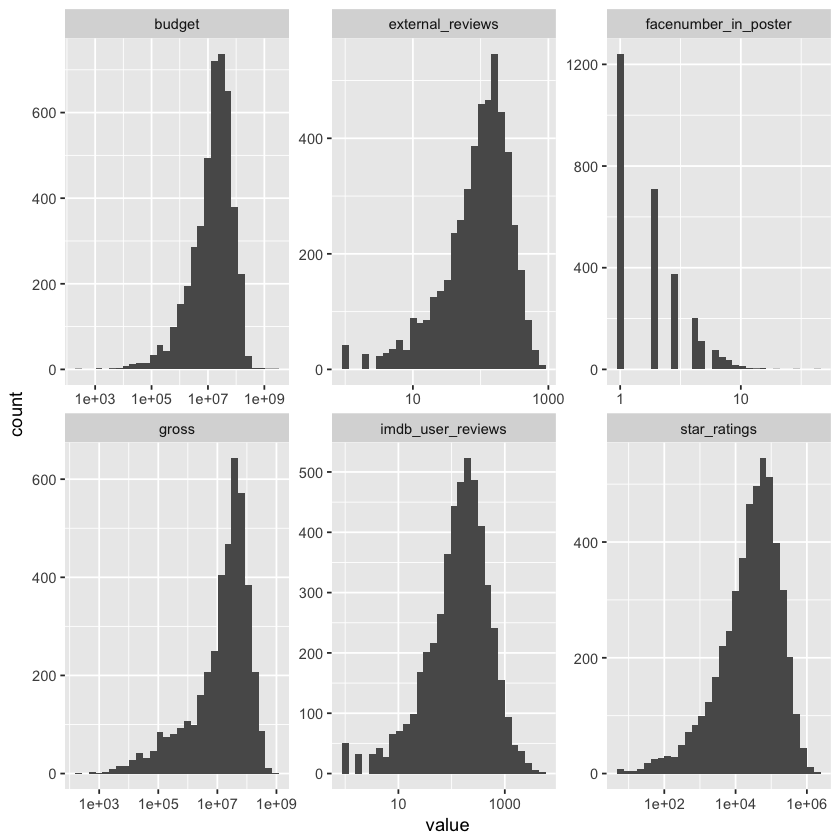

In [15]:
movies %>%
    select(budget,
           gross,
           facenumber_in_poster,
           star_ratings,
           imdb_user_reviews,
           external_reviews) %>%
    gather() %>%
    ggplot(aes(x = value)) +
        geom_histogram(na.rm = TRUE) +
        scale_x_log10() +
        facet_wrap(~ key, scales = "free")
# note, not shifting by 1 here. Ok with infinite variables

How about some categoricals?

Check data set again to see what I want:

In [16]:
glimpse(movies)

Observations: 4,998
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color", NA, "...
$ director_name             <chr> "James Cameron", "Gore Verbinski", "Sam M...
$ external_reviews          <int> 723, 302, 602, 813, NA, 462, 392, 324, 63...
$ duration                  <int> 178, 169, 148, 164, NA, 132, 156, 100, 14...
$ director_facebook_likes   <int> 0, 563, 0, 22000, 131, 475, 0, 15, 0, 282...
$ actor_3_facebook_likes    <int> 855, 1000, 161, 23000, NA, 530, 4000, 284...
$ actor_2_name              <chr> "Joel David Moore", "Orlando Bloom", "Ror...
$ actor_1_facebook_likes    <int> 1000, 40000, 11000, 27000, 131, 640, 2400...
$ gross                     <int> 760505847, 309404152, 200074175, 44813064...
$ genres                    <chr> "Action|Adventure|Fantasy|Sci-Fi", "Actio...
$ actor_1_name              <chr> "CCH Pounder", "Johnny Depp", "Christoph ...
$ movie_title               <chr> "Avatar ", "Pirates of the Caribbean: At ...
$ star_ratings    

Ones that are mostly easily countable:
* `color`
* `genres`
* `language`
* `country`
* `content_rating`

Show the top and bottom relative frequencies for each:

In [17]:
df_freq_summary <- function(name, df) {
  df %>%
    count_(name) %>%
    mutate(freq = n / sum(n)) %>%
    arrange(desc(n)) %>%
    headTail(top = 5, bottom = 5)
}

my_variables <- c("color", "genres", "language", "country", "content_rating")
lapply(my_variables, df_freq_summary, movies)

,color,n,freq
1,Color,4772,0.95
2,Black and White,207,0.04
3,NA,19,0
...,NA,...,...
11,Color,4772,0.95
21,Black and White,207,0.04
31,NA,19,0
,genres,n,freq
1,Drama,235,0.05
2,Comedy,205,0.04


Now do the same but treemap plots individually:

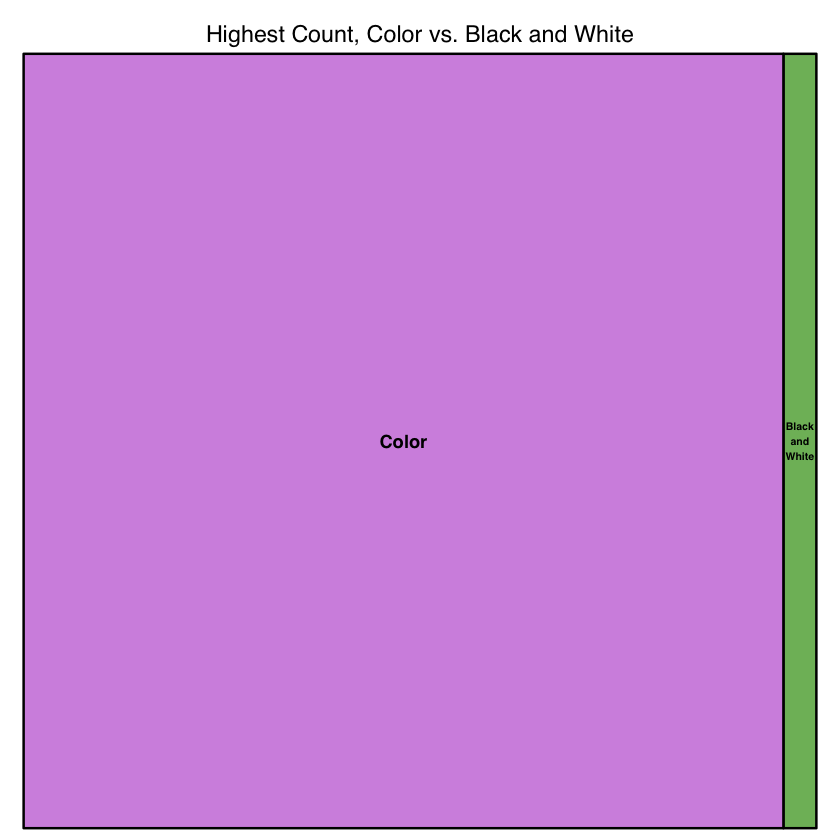

In [18]:
movies %>%
    group_by(color) %>%
    mutate(count = 1) %>%
    summarise(Total_Response = sum(count)) %>%
    treemap(index = c("color"),
            vSize = "Total_Response",
            title = "Highest Count, Color vs. Black and White")

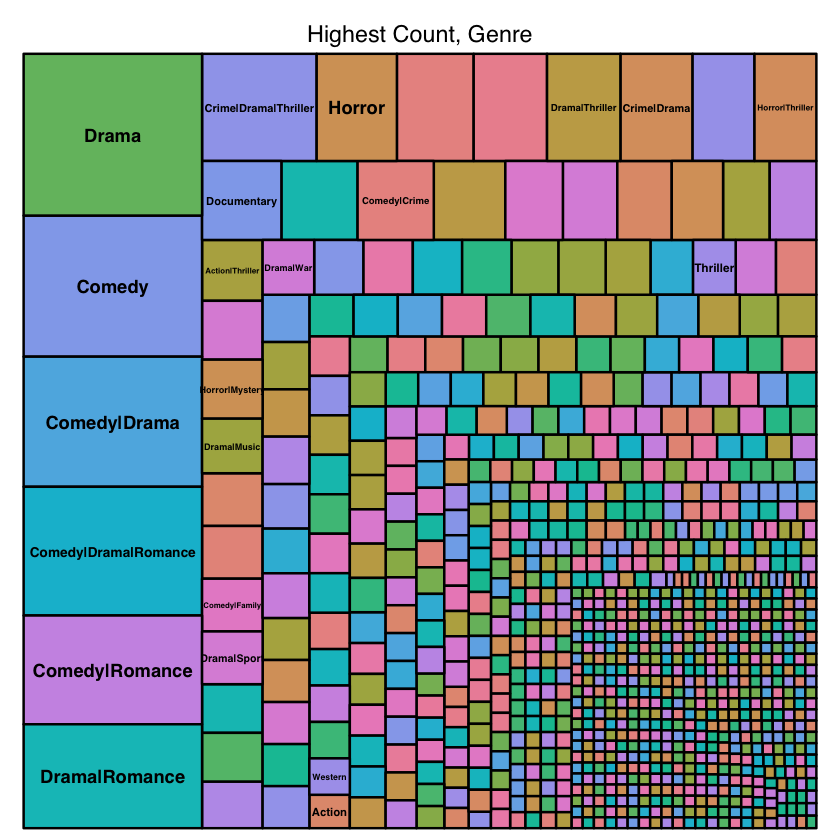

In [19]:
movies %>%
    group_by(genres) %>%
    mutate(count = 1) %>%
    summarise(Total_Response = sum(count)) %>%
    treemap(index = c("genres"),
            vSize = "Total_Response",
           title = "Highest Count, Genre")

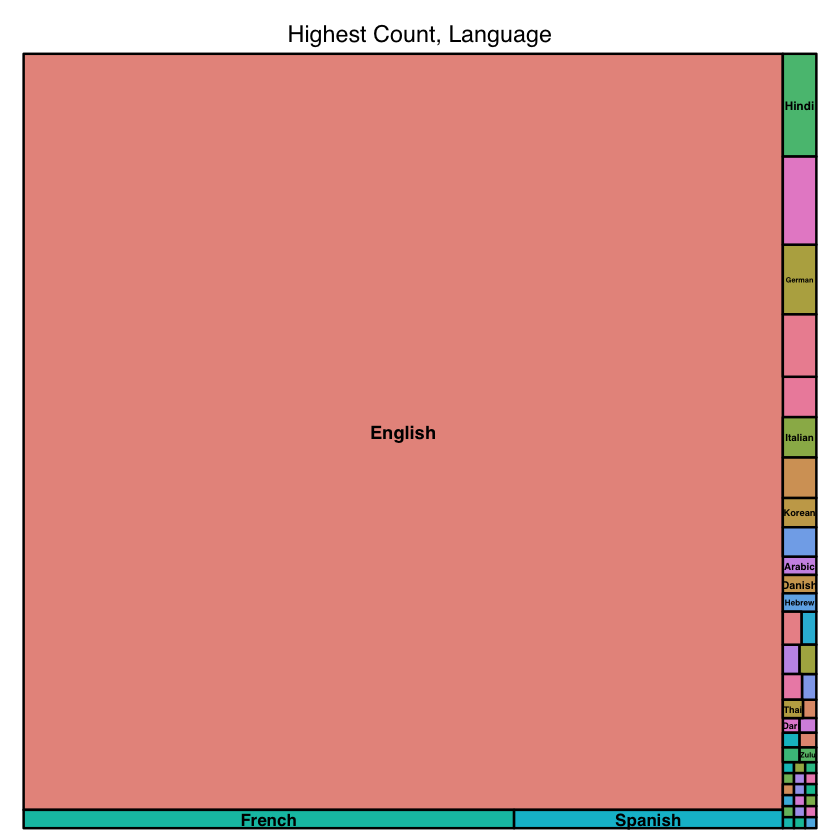

In [20]:
movies %>%
    group_by(language) %>%
    mutate(count = 1) %>%
    summarise(Total_Response = sum(count)) %>%
    treemap(index = c("language"),
            vSize = "Total_Response",
           title = "Highest Count, Language")

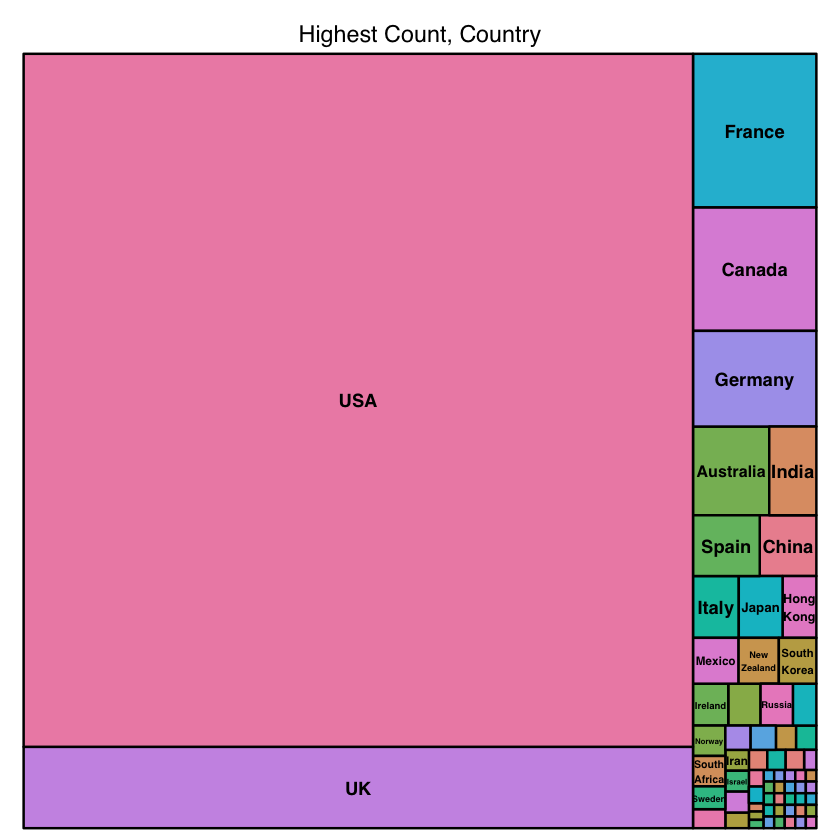

In [21]:
movies %>%
    group_by(country) %>%
    mutate(count = 1) %>%
    summarise(Total_Response = sum(count)) %>%
    treemap(index = c("country"),
            vSize = "Total_Response",
           title = "Highest Count, Country")

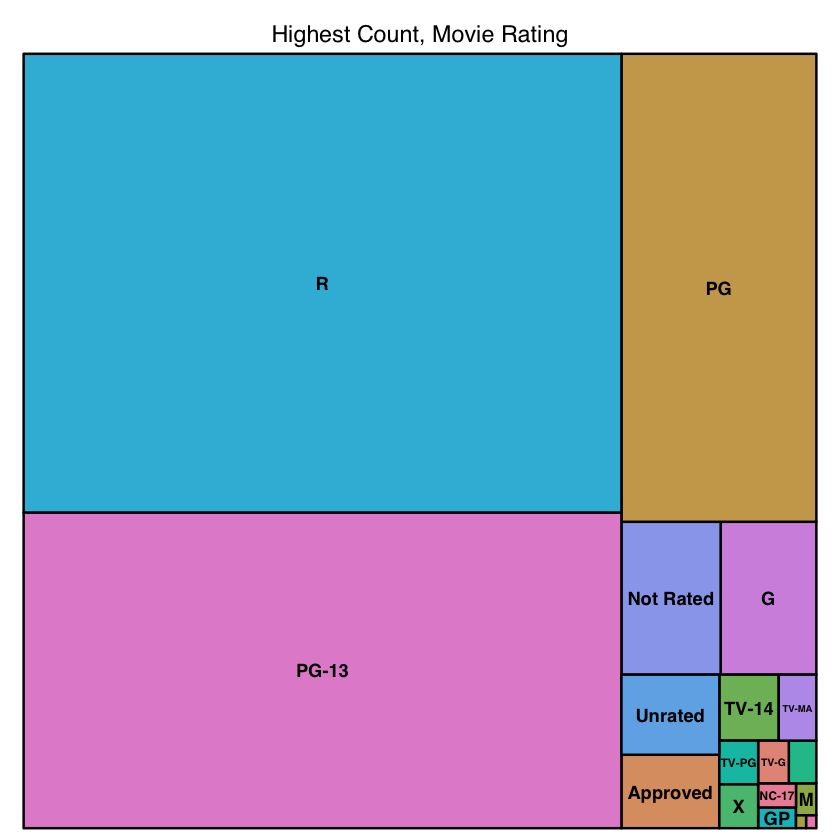

In [22]:
movies %>%
    group_by(content_rating) %>%
    mutate(count = 1) %>%
    summarise(Total_Response = sum(count)) %>%
    treemap(index = c("content_rating"),
            vSize = "Total_Response",
           title = "Highest Count, Movie Rating")

##### Add relevant variables
Now, add variable of how many genres a movies is given. Could be interesting:

In [23]:
movies

color,director_name,external_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,imdb_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,NA,NA,12,7.1,NA,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000
Color,Sam Raimi,392,156,0,4000,James Franco,24000,336530303,Action|Adventure|Romance,⋯,1902,English,USA,PG-13,258000000,2007,11000,6.2,2.35,0
Color,Nathan Greno,324,100,15,284,Donna Murphy,799,200807262,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,⋯,387,English,USA,PG,260000000,2010,553,7.8,1.85,29000
Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,458991599,Action|Adventure|Sci-Fi,⋯,1117,English,USA,PG-13,250000000,2015,21000,7.5,2.35,118000
Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,301956980,Adventure|Family|Fantasy|Mystery,⋯,973,English,UK,PG,250000000,2009,11000,7.5,2.35,10000


In [24]:
movies <- mutate(movies,
                num_genres = sapply(gregexpr("[|]", movies$genres), length))
movies

color,director_name,external_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_genres
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000,3
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0,2
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000,2
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,1
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,NA,12,7.1,NA,0,1
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000,2
Color,Sam Raimi,392,156,0,4000,James Franco,24000,336530303,Action|Adventure|Romance,⋯,English,USA,PG-13,258000000,2007,11000,6.2,2.35,0,2
Color,Nathan Greno,324,100,15,284,Donna Murphy,799,200807262,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,⋯,English,USA,PG,260000000,2010,553,7.8,1.85,29000,6
Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,458991599,Action|Adventure|Sci-Fi,⋯,English,USA,PG-13,250000000,2015,21000,7.5,2.35,118000,2
Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,301956980,Adventure|Family|Fantasy|Mystery,⋯,English,UK,PG,250000000,2009,11000,7.5,2.35,10000,3


##### Summarize questions that stick out
* fb likes have hints of bimodal. Why?
* note that there seems to be a good mix of comedy and drama as the top genre mixes - also other tree plots.

That's it. That's all I get out of this. 

##### Investigate bimodal nature of fb likes:
Why bimodal?

Look at log plot again:

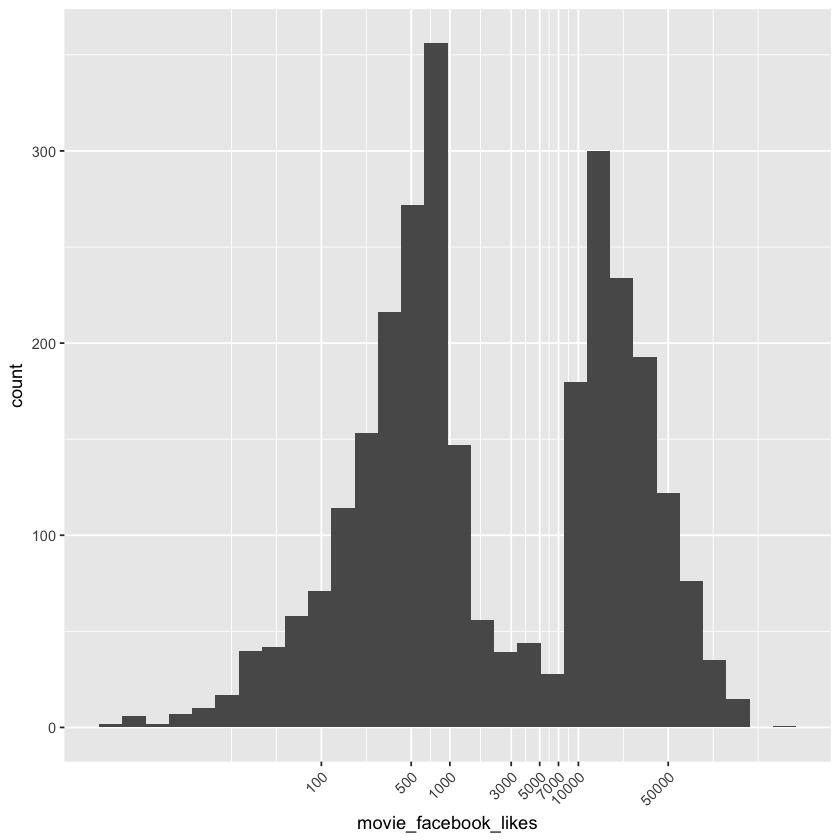

In [25]:
ggplot(subset(movies, movie_facebook_likes > 0), aes(x = movie_facebook_likes)) +
    geom_histogram(bins = 30, na.rm = TRUE) +
    scale_x_log10(breaks = c(100, 500, 1000, 3000, 5000, 7000, 10000, 50000)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

So why a dip around 5000-7000? check out original data

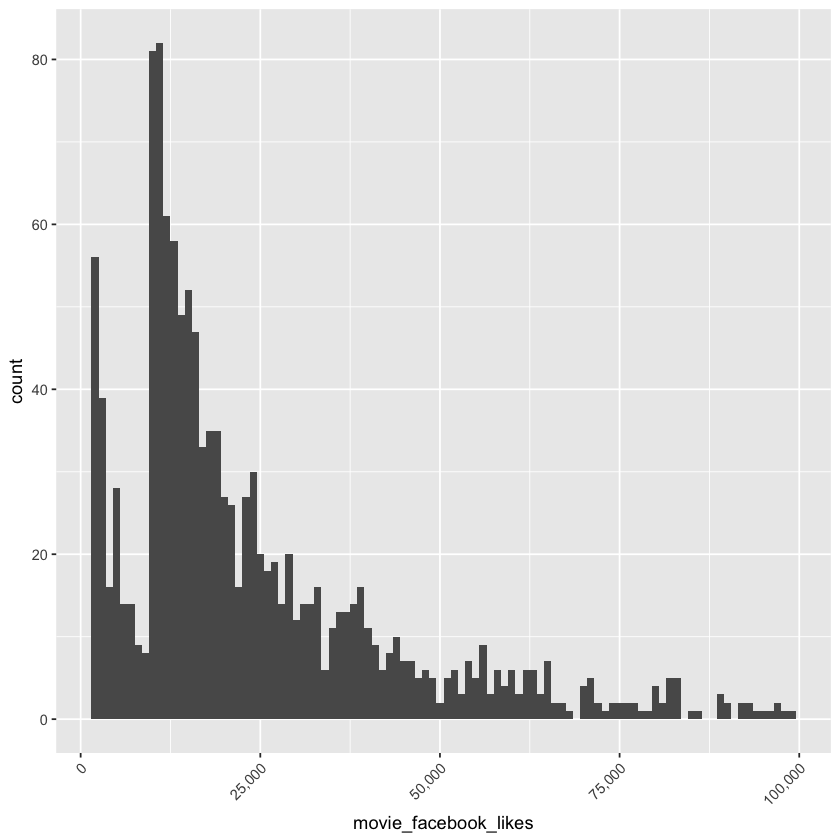

In [26]:
ggplot(subset(movies, movie_facebook_likes > 1000 & movie_facebook_likes < 100000), aes(x = movie_facebook_likes)) +
#     geom_histogram(bins = 50, na.rm = TRUE) +
    geom_histogram(binwidth = 1000, na.rm = TRUE) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_x_continuous(labels = scales::comma)

The same dip between about 2000 and 8,000 can be seen. That's just the way the data is...

##### Now move on to bivariate analysis

##### Speculate on what could be analyzed
Still too early to tell, the only thing I learned here is that there is a dip in the low thousands of likes. 

Still, I wonder what could be indicative of a movies as a 'cult' film. Are there any patterns among the other variables that would type a film as a 'cult' film? Will keep eye on this as I proceed.

I'll side-track a little and get a list of cult films, then see what cult films are in my list. Note, in the `plot_keywords` variable there is indeed sometimes a 'cult' tag, however this is not completely reliable given only up to five tags were grabbed from a list of sometimes dozens of tags from the 

Pull xpath into data frame:

In [27]:
library(rvest)

cult_films_url <- read_html("https://en.wikipedia.org/wiki/List_of_cult_films")

cult_films <- cult_films_url %>%
    html_nodes(xpath='//*[@id="mw-content-text"]/div/table') %>%
    html_table(fill = TRUE)
cult_films <- arrange(cult_films[[1]], Film)

Loading required package: xml2

Attaching package: ‘rvest’

The following object is masked from ‘package:readr’:

    guess_encoding



In [28]:
cult_films

Film,Year,Director,Source
¿Qué he hecho yo para merecer esto? (What Have I Done to Deserve This?),1984,Pedro Almodóvar,[983]
...All the Marbles (also known as California Dolls),1981,Robert Aldrich,[66]
10 Things I Hate About You,1999,Gil Junger,[14]
100 Jahre Adolf Hitler (100 Years of Adolf Hitler),1989,Christoph Schlingensief,[22]
12 Monkeys,1995,Terry Gilliam,[15][16]
1941,1979,Steven Spielberg,[27]
1991: The Year Punk Broke,1991,David Markey,[28]
200 Motels,1971,Tony Palmer,[23][24][25]
2001: A Space Odyssey,1968,Stanley Kubrick,[20]
28 Days Later,2002,Danny Boyle,[18]


In [29]:
movies

color,director_name,external_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_genres
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000,3
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0,2
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000,2
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,1
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,NA,12,7.1,NA,0,1
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000,2
Color,Sam Raimi,392,156,0,4000,James Franco,24000,336530303,Action|Adventure|Romance,⋯,English,USA,PG-13,258000000,2007,11000,6.2,2.35,0,2
Color,Nathan Greno,324,100,15,284,Donna Murphy,799,200807262,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,⋯,English,USA,PG,260000000,2010,553,7.8,1.85,29000,6
Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,458991599,Action|Adventure|Sci-Fi,⋯,English,USA,PG-13,250000000,2015,21000,7.5,2.35,118000,2
Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,301956980,Adventure|Family|Fantasy|Mystery,⋯,English,UK,PG,250000000,2009,11000,7.5,2.35,10000,3


Now to line up cult_films with movies:

In [30]:
# make column with yes or no if cult

# each title in movies$movie_title must be somewhere in cult_films$Film

# check if each movies$movie_title is similar to any of cult_films$Film
    # if yes, add yes to column
    # if no, add no to column

#√ add column to cult_films via vectorized op
#√ add concatenated columns 
#√ learn how to use agrep
#√ practice loop through variable to print match to verify works
#√ try vectorized operation
    #√ doesn't work:
# investigate why vect op doesn't work

Make query column to see if a movie is likely in the cult movies list from wikipedia:

In [31]:
movies$query.cult <- lapply(movies$movie_title, function(x) agrep(x, cult_films$Film)[1])

In [48]:
my_var <- 5

In [49]:
typeof(as.character(my_var))

[1] "character"

Create is.cult variable:

In [32]:
# movies$is.cult <- lapply(movies$query.cult, function(x) !is.na(x))
movies$is.cult <- as.character(lapply(movies$query.cult, function(x) !is.na(x))) 

Remove query column:

In [33]:
movies <- select(movies, -(query.cult))
movies

color,director_name,external_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_genres,is.cult
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,USA,PG-13,237000000,2009,936,7.9,1.78,33000,3,FALSE
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,USA,PG-13,300000000,2007,5000,7.1,2.35,0,2,FALSE
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,UK,PG-13,245000000,2015,393,6.8,2.35,85000,2,FALSE
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,1,FALSE
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,12,7.1,NA,0,1,FALSE
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,USA,PG-13,263700000,2012,632,6.6,2.35,24000,2,FALSE
Color,Sam Raimi,392,156,0,4000,James Franco,24000,336530303,Action|Adventure|Romance,⋯,USA,PG-13,258000000,2007,11000,6.2,2.35,0,2,FALSE
Color,Nathan Greno,324,100,15,284,Donna Murphy,799,200807262,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,⋯,USA,PG,260000000,2010,553,7.8,1.85,29000,6,FALSE
Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,458991599,Action|Adventure|Sci-Fi,⋯,USA,PG-13,250000000,2015,21000,7.5,2.35,118000,2,FALSE
Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,301956980,Adventure|Family|Fantasy|Mystery,⋯,UK,PG,250000000,2009,11000,7.5,2.35,10000,3,FALSE


In [ ]:
y <- movies$is.cult[200]
z <- as.character(y)
typeof(z)

### Bivariate analysis

Using is.cult as id variables
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


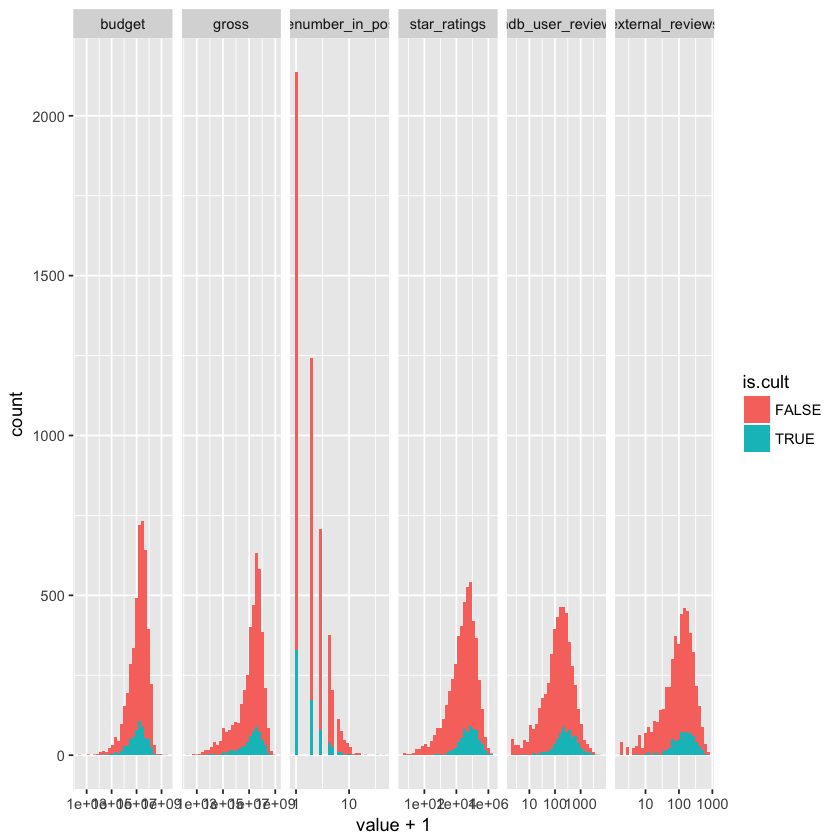

In [98]:
movies %>%
    select(is.cult,
           budget,
           gross,
           facenumber_in_poster,
           star_ratings,
           imdb_user_reviews,
           external_reviews) %>%
    melt() %>%
    ggplot(aes(x=value + 1, fill=is.cult)) +
    geom_histogram(na.rm = TRUE) +
    scale_x_log10() +
    facet_grid( ~ variable, scales = "free")